<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_1_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.2_n20.csv',
 'data_multi_delta_-1.2_n30.csv',
 'data_multi_delta_-1.2_n60.csv',
 'data_multi_delta_-1.2_n120.csv',
 'data_multi_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,62.232586,45.844166,0.035777,118.112529,118.089617,0.022912
1,0.0,1.0,56.333542,90.367194,-0.033223,156.667513,156.721111,-0.053598
2,0.0,2.0,27.095136,76.990916,-0.032797,114.053255,114.063488,-0.010233
3,0.0,3.0,21.536681,93.005642,-0.033202,124.509122,124.517952,-0.008830
4,0.0,4.0,52.129420,84.915468,-0.037030,147.007858,147.057880,-0.050022
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,47.052926,54.167064,-0.030292,111.189698,111.227016,-0.037317
29996,999.0,26.0,68.142780,48.977294,0.045920,127.165995,127.131127,0.034868
29997,999.0,27.0,28.211436,25.015167,0.014210,63.240812,63.177284,0.063528
29998,999.0,28.0,59.793816,38.371903,0.055676,108.221394,108.155414,0.065980


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,62.232586,45.844166,0.035777,118.112529,118.089617,0.022912
1,0.0,1.0,56.333542,90.367194,-0.033223,156.667513,156.721111,-0.053598
2,0.0,2.0,27.095136,76.990916,-0.032797,114.053255,114.063488,-0.010233
3,0.0,3.0,21.536681,93.005642,-0.033202,124.509122,124.517952,-0.008830
4,0.0,4.0,52.129420,84.915468,-0.037030,147.007858,147.057880,-0.050022
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,47.052926,54.167064,-0.030292,111.189698,111.227016,-0.037317
29996,999.0,26.0,68.142780,48.977294,0.045920,127.165995,127.131127,0.034868
29997,999.0,27.0,28.211436,25.015167,0.014210,63.240812,63.177284,0.063528
29998,999.0,28.0,59.793816,38.371903,0.055676,108.221394,108.155414,0.065980


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    62.232586  45.844166  0.035777  118.112529  118.089617  0.022912
      1.0    56.333542  90.367194 -0.033223  156.667513  156.721111 -0.053598
      2.0    27.095136  76.990916 -0.032797  114.053255  114.063488 -0.010233
      3.0    21.536681  93.005642 -0.033202  124.509122  124.517952 -0.008830
      4.0    52.129420  84.915468 -0.037030  147.007858  147.057880 -0.050022
...                ...        ...       ...         ...         ...       ...
999.0 25.0   47.052926  54.167064 -0.030292  111.189698  111.227016 -0.037317
      26.0   68.142780  48.977294  0.045920  127.165995  127.131127  0.034868
      27.0   28.211436  25.015167  0.014210   63.240812   63.177284  0.063528
      28.0   59.793816  38.371903  0.055676  108.221394  108.155414  0.065980
      29.0   93.298485  75.652592 -0.006260  178.944817  179.018239 -0.073422

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    62.232586  45.844166  0.035777  118.112529  118.089617  0.022912
      1.0    56.333542  90.367194 -0.033223  156.667513  156.721111 -0.053598
      2.0    27.095136  76.990916 -0.032797  114.053255  114.063488 -0.010233
      3.0    21.536681  93.005642 -0.033202  124.509122  124.517952 -0.008830
      4.0    52.129420  84.915468 -0.037030  147.007858  147.057880 -0.050022
...                ...        ...       ...         ...         ...       ...
999.0 25.0   47.052926  54.167064 -0.030292  111.189698  111.227016 -0.037317
      26.0   68.142780  48.977294  0.045920  127.165995  127.131127  0.034868
      27.0   28.211436  25.015167  0.014210   63.240812   63.177284  0.063528
      28.0   59.793816  38.371903  0.055676  108.221394  108.155414  0.065980
      29.0   93.298485  75.652592 -0.006260  178.944817  179.018239 -0.073422

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,62.232586,45.844166,0.035777,118.112529,118.089617,0.022912
1,0.0,1.0,56.333542,90.367194,-0.033223,156.667513,156.721111,-0.053598
2,0.0,2.0,27.095136,76.990916,-0.032797,114.053255,114.063488,-0.010233
3,0.0,3.0,21.536681,93.005642,-0.033202,124.509122,124.517952,-0.008830
4,0.0,4.0,52.129420,84.915468,-0.037030,147.007858,147.057880,-0.050022
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,47.052926,54.167064,-0.030292,111.189698,111.227016,-0.037317
29996,999.0,26.0,68.142780,48.977294,0.045920,127.165995,127.131127,0.034868
29997,999.0,27.0,28.211436,25.015167,0.014210,63.240812,63.177284,0.063528
29998,999.0,28.0,59.793816,38.371903,0.055676,108.221394,108.155414,0.065980


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    62.232586  45.844166  0.035777  118.112529  118.089617  0.022912
      1.0    56.333542  90.367194 -0.033223  156.667513  156.721111 -0.053598
      2.0    27.095136  76.990916 -0.032797  114.053255  114.063488 -0.010233
      3.0    21.536681  93.005642 -0.033202  124.509122  124.517952 -0.008830
      4.0    52.129420  84.915468 -0.037030  147.007858  147.057880 -0.050022
...                ...        ...       ...         ...         ...       ...
999.0 25.0   47.052926  54.167064 -0.030292  111.189698  111.227016 -0.037317
      26.0   68.142780  48.977294  0.045920  127.165995  127.131127  0.034868
      27.0   28.211436  25.015167  0.014210   63.240812   63.177284  0.063528
      28.0   59.793816  38.371903  0.055676  108.221394  108.155414  0.065980
      29.0   93.298485  75.652592 -0.006260  178.944817  179.018239 -0.073422

[30000 rows x 6 columns]

<AxesSubplot:xlabel='x2', ylabel='e'>

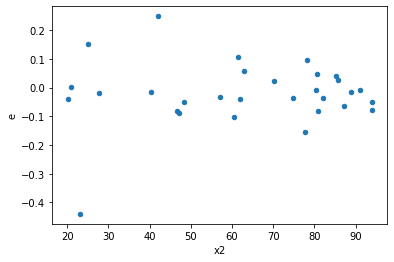

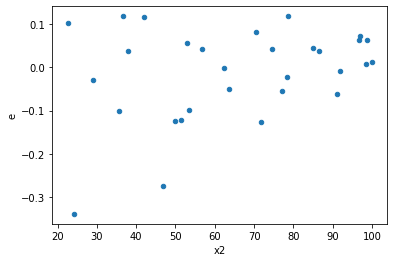

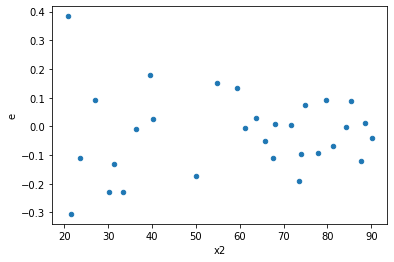

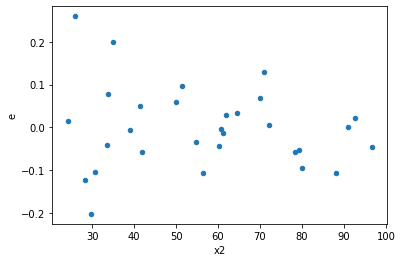

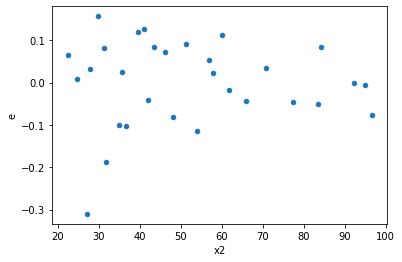

In [17]:
tablenew0 = table.loc[31.0]
tablenew1 = table.loc[32.0]
tablenew2 = table.loc[33.0]
tablenew3 = table.loc[39.0]
tablenew4 = table.loc[48.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,10.0,10.0,0.030416147129708974,0.08848842501085477,0.0030416147129708974,0.008848842501085478,2.9092581855781368,0.10717352124822455,0.9464132393758877,0.05358676062411227,Reject001=1 : Homoscedasticity
8.0,10.0,10.0,0.04105500258641643,0.049880443237433424,0.004105500258641643,0.0049880443237433425,1.2149662670813473,0.7641359908142897,0.6179320045928551,0.38206799540714487,Reject001=1 : Homoscedasticity
28.0,10.0,10.0,0.021884923141560816,0.091996132979905,0.0021884923141560816,0.0091996132979905,4.203630617518536,0.033071601919289595,0.9834641990403552,0.016535800959644797,Reject001=1 : Homoscedasticity
29.0,10.0,10.0,0.08389774688544054,0.08988841910002673,0.008389774688544054,0.008988841910002673,1.0714044469247337,0.9153020219454087,0.5423489890272957,0.45765101097270433,Reject001=1 : Homoscedasticity
30.0,10.0,10.0,0.06609969482365764,0.08855606466647518,0.006609969482365764,0.008855606466647518,1.3397348490447223,0.6525227686508492,0.6737386156745754,0.3262613843254246,Reject001=1 : Homoscedasticity
43.0,10.0,10.0,0.025770896953446695,0.051552138313524794,0.0025770896953446693,0.0051552138313524795,2.00040139878135,0.2895546066084709,0.8552226966957646,0.14477730330423544,Reject001=1 : Homoscedasticity
46.0,10.0,10.0,0.034738131574719555,0.03937177498039836,0.0034738131574719557,0.003937177498039836,1.1333878132078614,0.8469316804683404,0.5765341597658298,0.4234658402341702,Reject001=1 : Homoscedasticity
67.0,10.0,10.0,0.06336642676330613,0.0796180768469286,0.006336642676330613,0.007961807684692861,1.2564709880884966,0.725051607216332,0.637474196391834,0.362525803608166,Reject001=1 : Homoscedasticity
75.0,10.0,10.0,0.07057365600342055,0.09058153316678713,0.007057365600342055,0.009058153316678714,1.2835034812763115,0.7006603809387828,0.6496698095306086,0.3503301904693914,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,0.09650112352042696,0.04369430620182491,0.009650112352042696,0.004369430620182491,0.4527854661979752,0.22748045551267135,Reject001=1 : Homoscedasticity
1.0,10.0,10.0,0.12635499371673292,0.04399232561301709,0.012635499371673293,0.0043992325613017086,0.34816451901885753,0.11127508586775404,Reject001=1 : Homoscedasticity
2.0,10.0,10.0,0.16739207970538897,0.032954378024906,0.016739207970538898,0.0032954378024906,0.19686939837838144,0.016899356057114772,Reject001=1 : Homoscedasticity
3.0,10.0,10.0,0.030416147129708974,0.08848842501085477,0.0030416147129708974,0.008848842501085478,2.9092581855781368,0.10717352124822455,Reject001=1 : Homoscedasticity
4.0,10.0,10.0,0.13288136477483262,0.07138663974405222,0.013288136477483262,0.007138663974405222,0.5372208500794436,0.34167035892323516,Reject001=1 : Homoscedasticity
5.0,10.0,10.0,0.08586498571786648,0.028166684793506324,0.008586498571786647,0.0028166684793506326,0.32803458310766953,0.09326852780907939,Reject001=1 : Homoscedasticity
6.0,10.0,10.0,0.18028895253333874,0.04701437987870495,0.018028895253333874,0.004701437987870495,0.2607723835436402,0.045101799988134225,Reject001=1 : Homoscedasticity
7.0,10.0,10.0,0.13106323485784008,0.023430060406445696,0.013106323485784008,0.0023430060406445696,0.17876912951110585,0.011819337589891407,Reject001=1 : Homoscedasticity
8.0,10.0,10.0,0.04105500258641643,0.049880443237433424,0.004105500258641643,0.0049880443237433425,1.2149662670813473,0.7641359908142897,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      849
Reject001=0 : Heteroscedasticity    151
Name: Result_test, dtype: int64